In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import scipy as sci
from scipy import optimize

# Offline Stage


In [4]:


# Create second derivative matrix
def hf_sec_der(xgrid):
    N = len(xgrid)
    dx = xgrid[1] - xgrid[0]

    # Generate the matrix for the second derivative using a five-point stencil
    main_diag = np.ones(N) * (-5.0 / 2 / dx**2)
    off_diag = np.ones(N - 1) * 4 / 3 / dx**2
    off_diag2 = np.ones(N - 2) * (-1.0 / (12 * dx**2))

    # Matrix chart

    D2 = np.diag(main_diag) + np.diag(off_diag, k=1) + np.diag(
      off_diag, k=-1) + np.diag(off_diag2, k=2) + np.diag(off_diag2, k=-2)

    return D2


# Create potential matrix
def hf_pot(xgrid):
      return np.diag(xgrid**2)


# Combine into big hamiltonian
def hf_sol(xgrid, alpha):
    d0 = hf_sec_der(xgrid)
    v = hf_pot(xgrid)
    H = -d0 + alpha * v
    return H




In [51]:

x_max = 10.0
h = 10**(-1)
x = np.arange(-x_max, x_max + h, h)
N_grid = x.shape[0]
# alphas = [.5, 5, 10, 15]
alphas = np.arange(0.5, 15.5, 0.5)
m = np.zeros((len(alphas), N_grid))


In [52]:

for i in range(len(alphas)):
    alpha_value = alphas[i]
    solutions_np = np.linalg.eigh(hf_sol(x, alpha_value))
    evals =  solutions_np[0]
    evects= solutions_np[1].T
    m[i] = evects[0] / np.linalg.norm(evects[0])*np.sign(evects[0][  int(len(x)/2)  ])
#     print("M")
#     print(m[i])


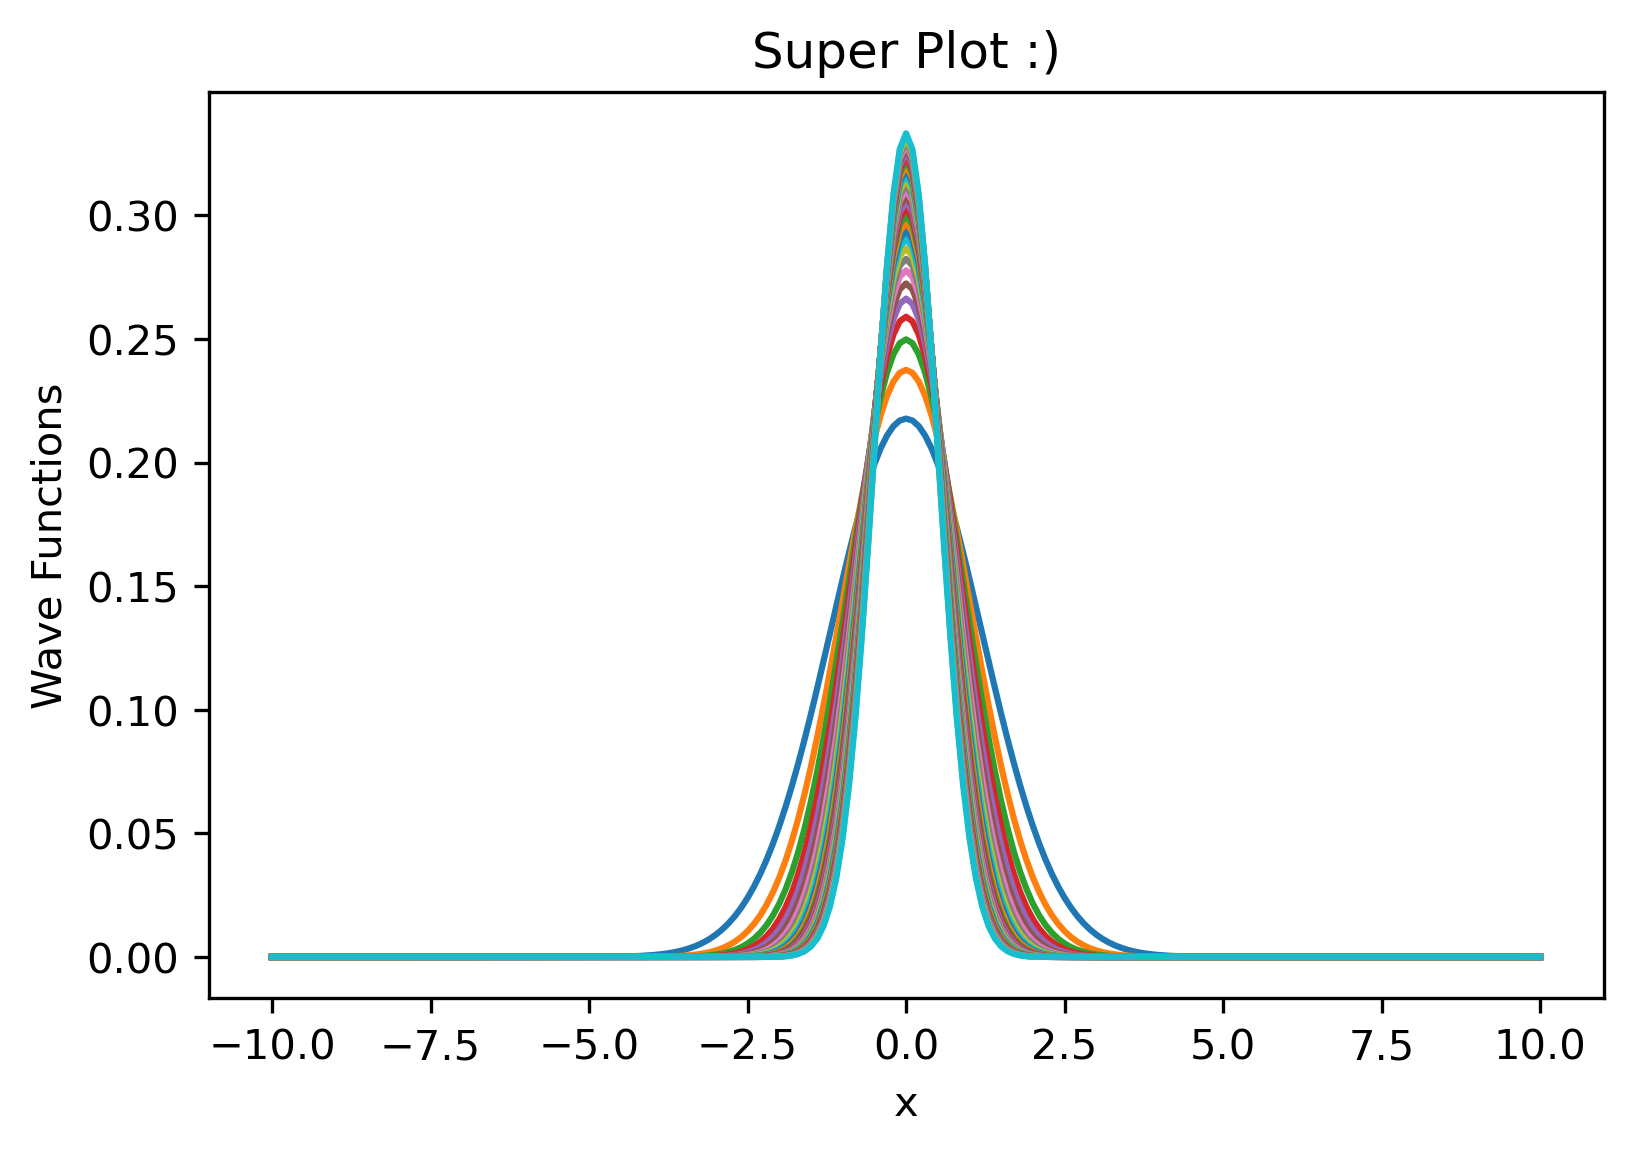

In [55]:
fig, ax = plt.subplots(dpi=300)


for i in range(len(m)):
    # Plot data on the axis
    ax.plot(x, m[i], )

# Add title and labels
ax.set_title("Super Plot :)")
ax.set_xlabel("x")
ax.set_ylabel("Wave Functions")



# Show the plot
plt.show()

In [63]:
# Get rbm coordinates
U, sigma, Vh = np.linalg.svd(m)
components = 3
reduced_basis = Vh[:components]

reduced_basis = [reduced_basis[i]*np.sign(reduced_basis[i][  int(len(x)/2)  ]) for i in range(len(reduced_basis))]

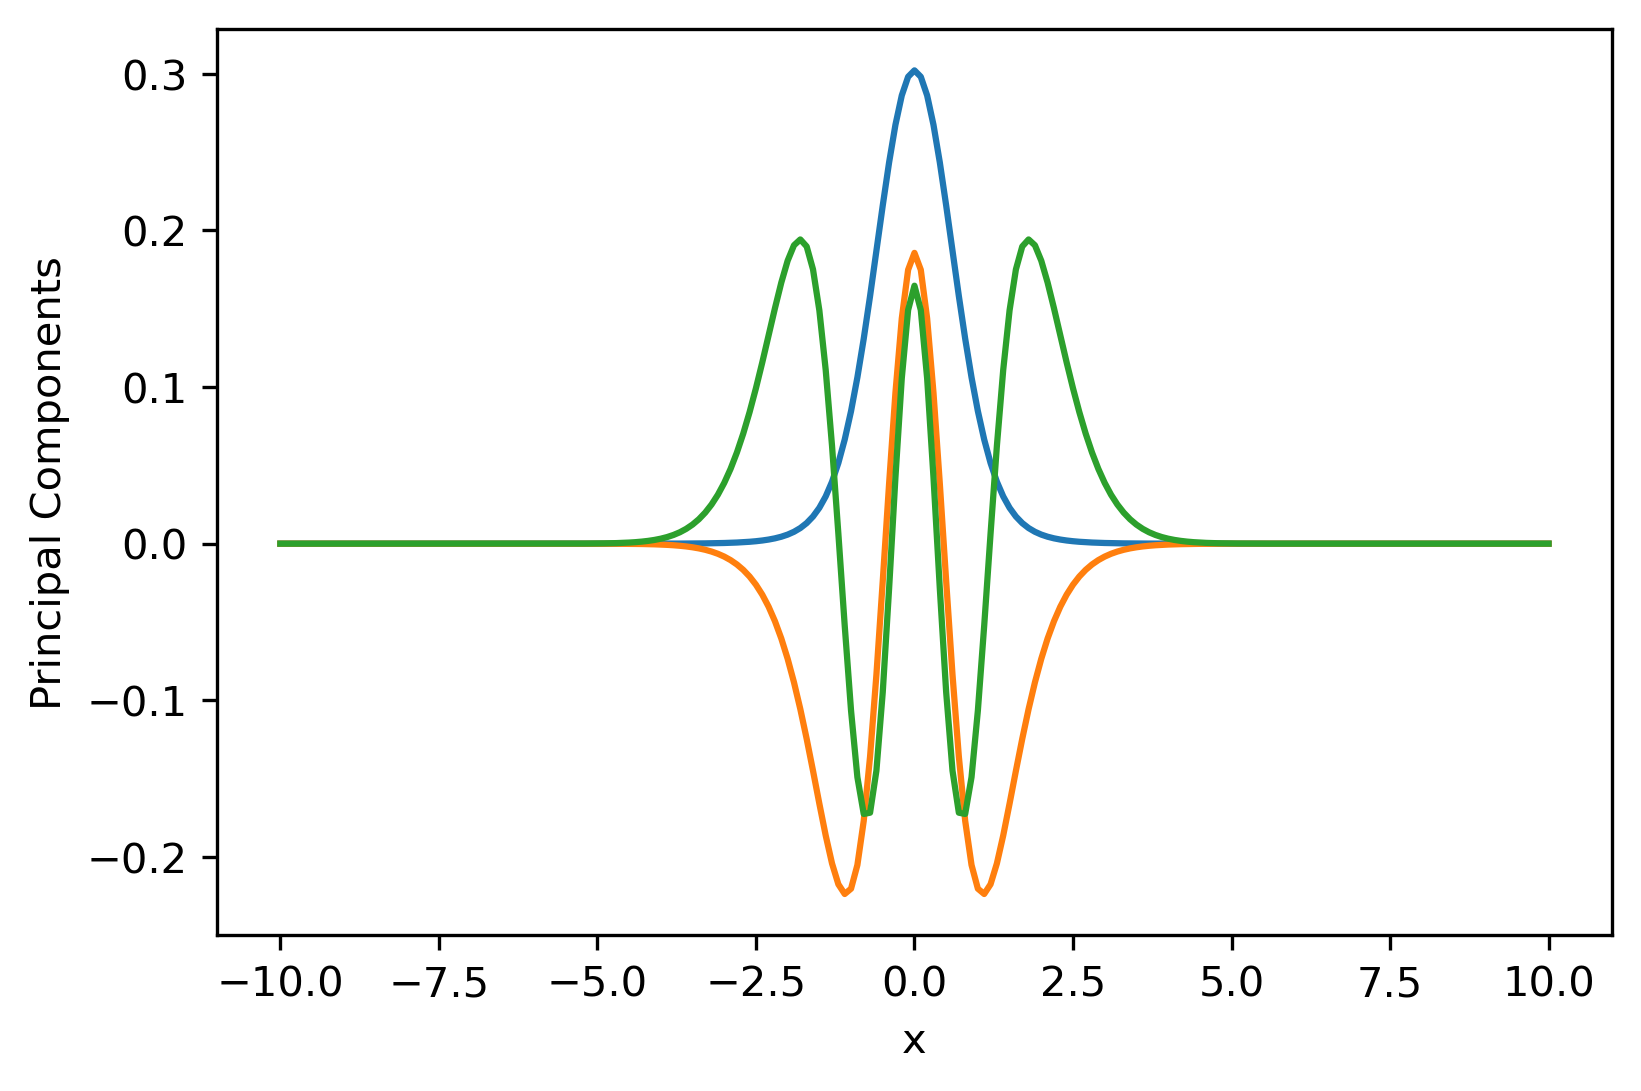

In [64]:
fig, ax = plt.subplots(dpi=300)


for i in range(len(reduced_basis)):
    # Plot data on the axis
    ax.plot(x, reduced_basis[i], )

# Add title and labels

ax.set_xlabel("x")
ax.set_ylabel("Principal Components")



# Show the plot
plt.show()

In [ ]:


# for i in range(1, len(reduced_basis)):
#     reduced_basis[i] = -reduced_basis[i]


# Get reduced equations (Galerkin projection?)
# This is literally copy-pasted code because I don't really understand it
# Sandwich second derivative hamiltonian with reduced coordinates
# Sandwich potential hamiltonian with reduced coordinates and multiple by alpha
# Add these things together to make one big, happy, reduced hamiltonian
def getSystem(H, psi_array, phi_array):
  # print("psi" + str(psi_array))
  # print(" ")
  # print("Phi" + str(phi_array))

  def system(a_vec):
    results = np.zeros(len(a_vec))
    results[-1] = -1  # from normalization
    for i in np.arange(0, len(a_vec) - 1, 1):
          for k in np.arange(0, len(a_vec) - 1, 1):
            results[i] += a_vec[k]*np.dot(psi_array[i],np.matmul(H,phi_array[k])) - \
            a_vec[-1]*a_vec[k]*np.dot(psi_array[i],phi_array[k])
    for k in np.arange(0, len(a_vec) - 1, 1):
          for kp in np.arange(0, len(a_vec) - 1, 1):
            results[-1] += a_vec[kp] * a_vec[k] * np.dot(psi_array[kp],
                                                         phi_array[k])
    return results
  

    return system
